In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

from sklearn import preprocessing

In [4]:
def loadDataset():
    f_dataset_blocks_difficulty_time = pd.read_csv(
        '/home/scicchitano/PyCharm_Projects/Neural Network/f_dataset_blocks_difficulty_time_csv_2.csv',
        low_memory=False)
    f_dataset_gas_time = pd.read_csv('/home/scicchitano/PyCharm_Projects/Neural Network/f_dataset_gas_time_csv_2.csv',
                                     low_memory=False)
    return f_dataset_blocks_difficulty_time, f_dataset_gas_time


f_dataset_blocks_difficulty_time, f_dataset_gas_time = loadDataset()

In [5]:

def minMax(x):
    scaler = preprocessing.MinMaxScaler()
    x =np.array(x).reshape(-1,1) #serve numpy array in fit_transform(),
    scaled_x = scaler.fit_transform(x)
    return scaled_x # serve come input per hist_den_plot

def mediana_quantile_mobile(x, window=20):
    df = pd.DataFrame(x)  # x deve essere list

    temp = df.rolling(window, min_periods=1, center=True)

    q1 = temp.quantile(0.25, interpolation='midpoint')
    q2 = temp.median()
    q3 = temp.quantile(0.75, interpolation='midpoint')

    s = (df - q2) / (1.5 * (q3 - q1))
    return s

def plot2d(x, y, xlabel, ylabel, title, ax):
    plt.rcParams['agg.path.chunksize'] = 10000
    # fig, ax = plt.subplots()
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(25))
    ax.tick_params(labelrotation=65)
    ax.plot(x, y)
    ax.axvline(x='2016-06-18', color='red', alpha=0.5)
    #ax.axvline(x='2019-01-05', color='red', alpha=0.5, ls= 'dashed')
    ax.axvline(x='2019-01-07', color='red', alpha=0.5)


def plot2dTimestampVerticalLine(x, y, xlabel, ylabel, title, ax):
    plt.rcParams['agg.path.chunksize'] = 10000
    # fig, ax = plt.subplots()
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(25))
    ax.tick_params(labelrotation=65)
    ax.plot(x, y)
    ax.axvline(x='2016-06-18', color='red', alpha=0.5)
    #ax.axvline(x='2019-01-05', color='red', alpha=0.5, ls= 'dashed')
    ax.axvline(x='2019-01-07', color='red', alpha=0.5)


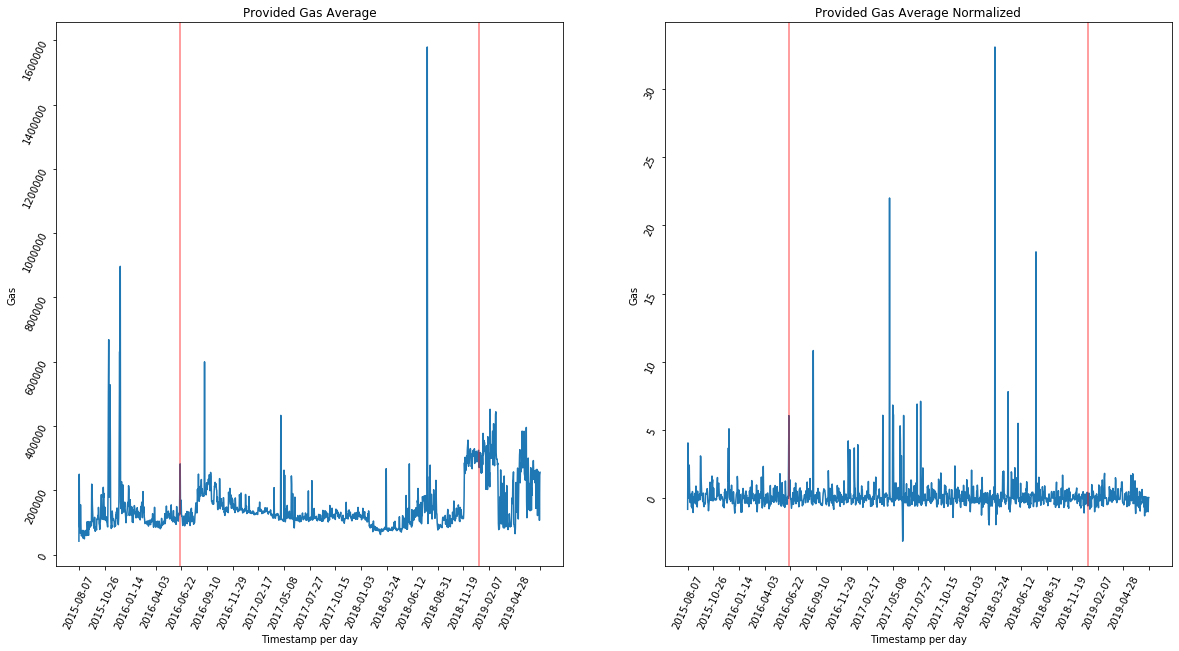

In [6]:
#Provided Gas Average
w = 20
weight = 20
height = 10

groups = f_dataset_gas_time.groupby(['block_timestamp'])['gas'].mean().to_dict()

a = list(groups.keys())
b = list(groups.values())
timestamp = a

#provided_gas_average = minMax(b)
provided_gas_average = mediana_quantile_mobile(b,w)
namePlot = 'Provided Gas Average Normalized'
nameYLabel = 'Gas'

fig, axes = plt.subplots(1, 2, figsize=(weight, height))
plot2d(a, b, 'Timestamp per day', nameYLabel, 'Provided Gas Average', axes[0])

plot2dTimestampVerticalLine(a, provided_gas_average, 'Timestamp per day', nameYLabel, namePlot, axes[1])
plt.show()


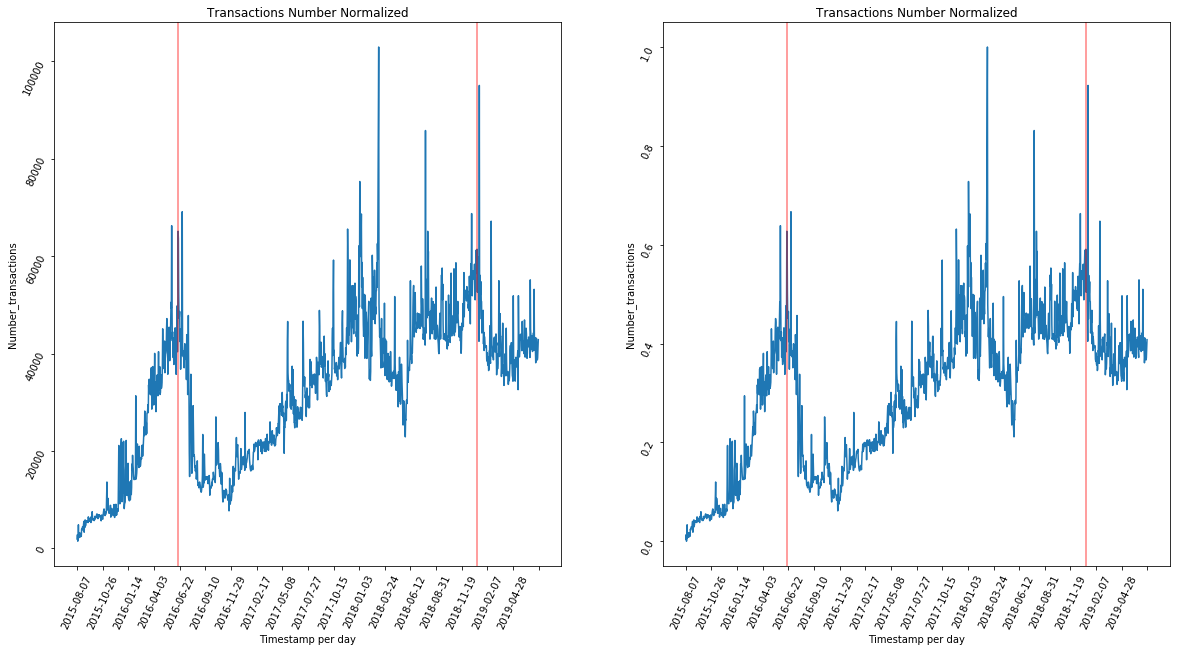

In [13]:

groups = f_dataset_gas_time.groupby(['block_timestamp']).size().to_dict()

a = list(groups.keys())
b = list(groups.values())

namePlot = 'Transactions Number Normalized'
nameYLabel = 'Number_transactions'

#transactions_number = mediana_quantile_mobile(b,120)
transactions_number = minMax(b)
fig, axes = plt.subplots(1, 2, figsize=(weight, height))
plot2d(a, b, 'Timestamp per day', nameYLabel, namePlot, axes[0])

plot2dTimestampVerticalLine(a, transactions_number, 'Timestamp per day', nameYLabel, namePlot, axes[1])
plt.show()

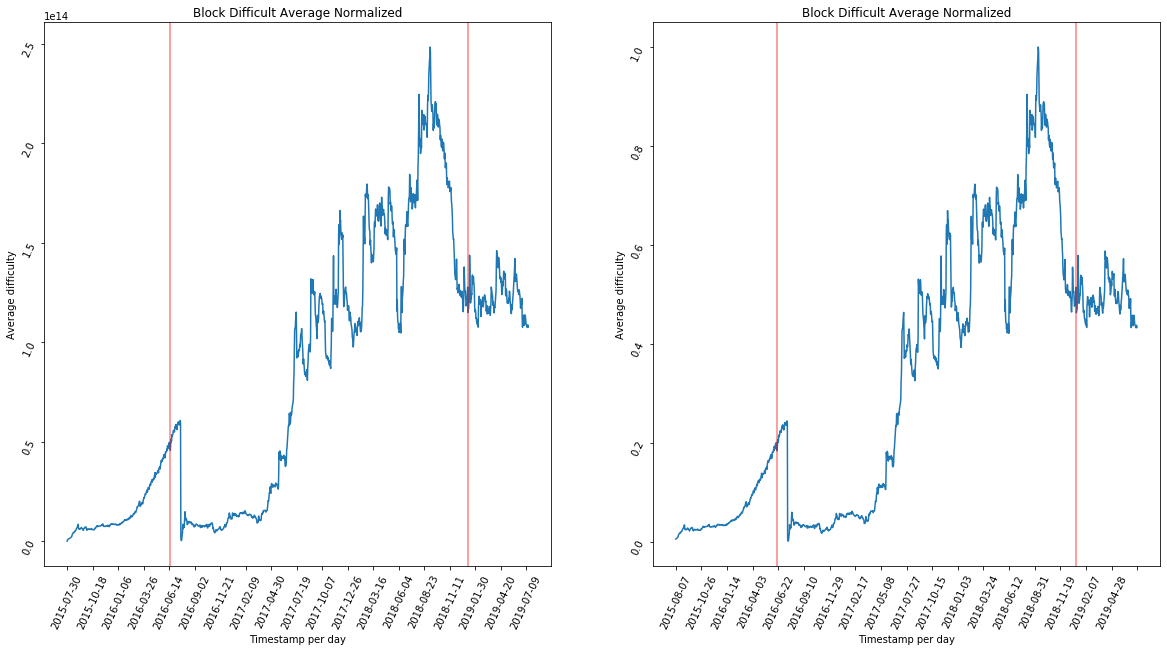

In [14]:
groups = f_dataset_blocks_difficulty_time.groupby(['timestamp'])['difficulty'].mean().to_dict()

a = list(groups.keys())
b = list(groups.values())

#block_difficulty_average = mediana_quantile_mobile(b, w)
block_difficulty_average = minMax(b)
fig, axes = plt.subplots(1, 2, figsize=(weight, height))
plot2d(a, b, 'Timestamp per day', 'Average difficulty', 'Block Difficult Average Normalized', axes[0])
plot2dTimestampVerticalLine(timestamp, block_difficulty_average[8:], 'Timestamp per day', 'Average difficulty',
                            'Block Difficult Average Normalized', axes[1])
plt.show()

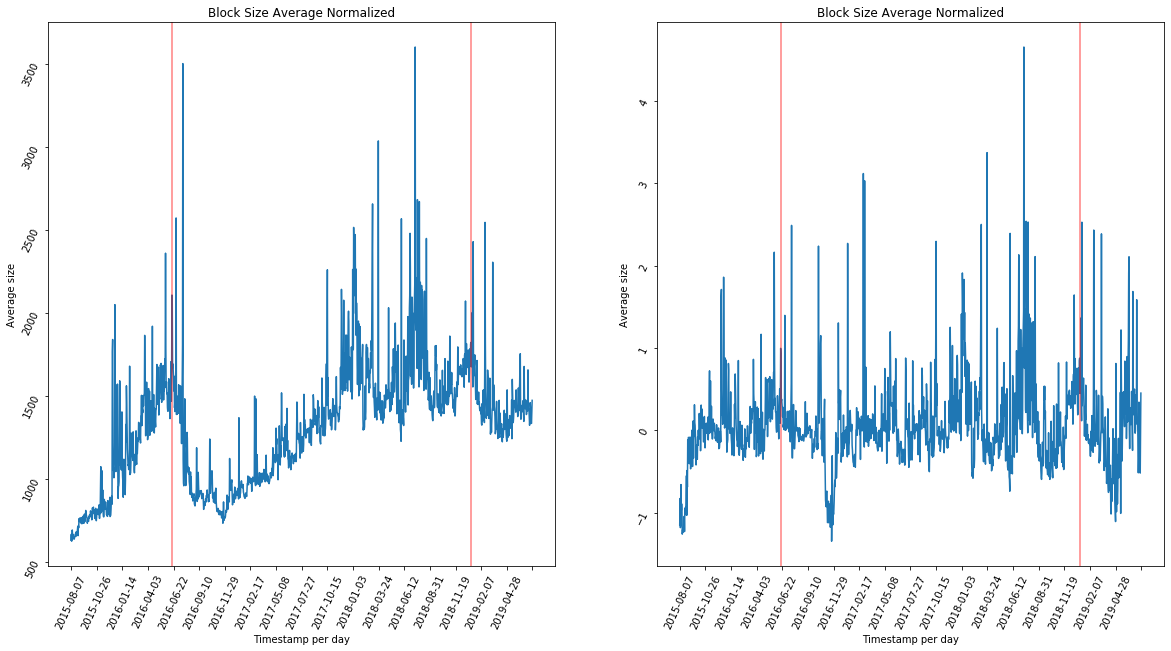

In [15]:
groups = f_dataset_blocks_difficulty_time.groupby(['timestamp'])['size'].mean().to_dict()

a = list(groups.keys())
b = list(groups.values())
b = b[8:]
block_size_average = mediana_quantile_mobile(b, 180)
#block_size_average = minMax(b)
fig, axes = plt.subplots(1, 2, figsize=(weight, height))
plot2d(timestamp, b, 'Timestamp per day', 'Average size', 'Block Size Average Normalized', axes[0])
plot2dTimestampVerticalLine(timestamp, block_size_average, 'Timestamp per day', 'Average size',
                            'Block Size Average Normalized', axes[1])
plt.show()


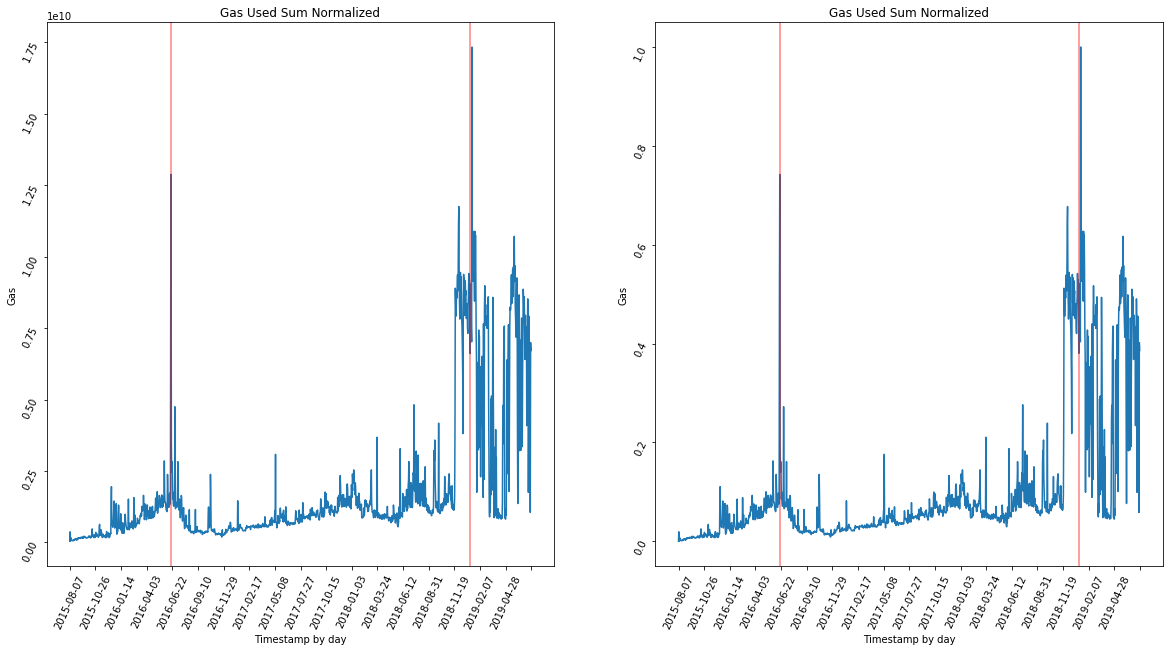

In [16]:
aggregation = {'gas_used': 'sum', 'transaction_count': 'sum'}
groups = f_dataset_blocks_difficulty_time.groupby('timestamp').agg(aggregation).rename(
    columns={'gas_used': 'gas_sum', 'transaction_count': 'transaction_sum'})
d = groups['gas_sum'].tolist()

e = groups['transaction_sum'].tolist()

d = d[8:]
e = e[8:]

#gas_used_sum = mediana_quantile_mobile(d, w)
gas_used_sum = minMax(d)
fig, axes = plt.subplots(1, 2, figsize=(weight, height))
plot2d(timestamp, d, 'Timestamp by day', 'Gas', 'Gas Used Sum Normalized', axes[0])

plot2dTimestampVerticalLine(timestamp, gas_used_sum, 'Timestamp by day', 'Gas', 'Gas Used Sum Normalized', axes[1])
plt.show()


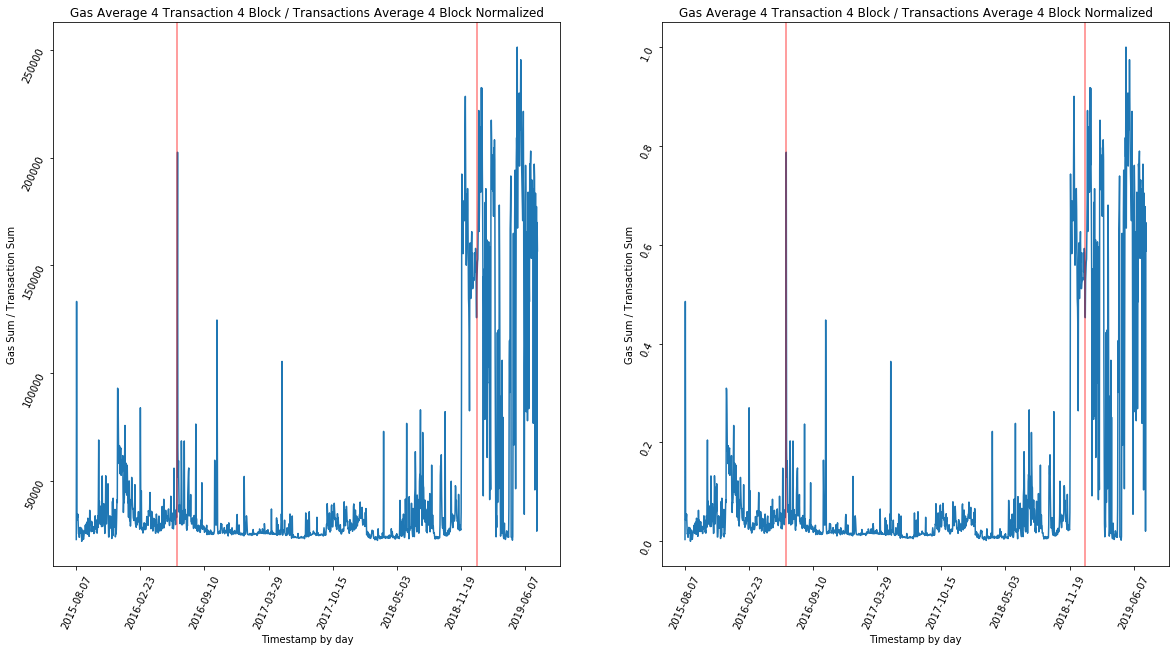

In [9]:
f = groups['gas_sum'].div(groups['transaction_sum']).tolist()
f = f[8:]

#f_norm = mediana_quantile_mobile(f,w)
f_norm = minMax(f)
gas_average_4_transaction_4_block_div_transactions_average_4_block = f_norm

fig, axes = plt.subplots(1, 2, figsize=(weight, height))
plot2d(timestamp, f, 'Timestamp by day', 'Gas Sum / Transaction Sum',
       'Gas Average 4 Transaction 4 Block / Transactions Average 4 Block Normalized', axes[0])

plot2dTimestampVerticalLine(timestamp, f_norm, 'Timestamp by day', 'Gas Sum / Transaction Sum',
                            'Gas Average 4 Transaction 4 Block / Transactions Average 4 Block Normalized', axes[1])
plt.show()


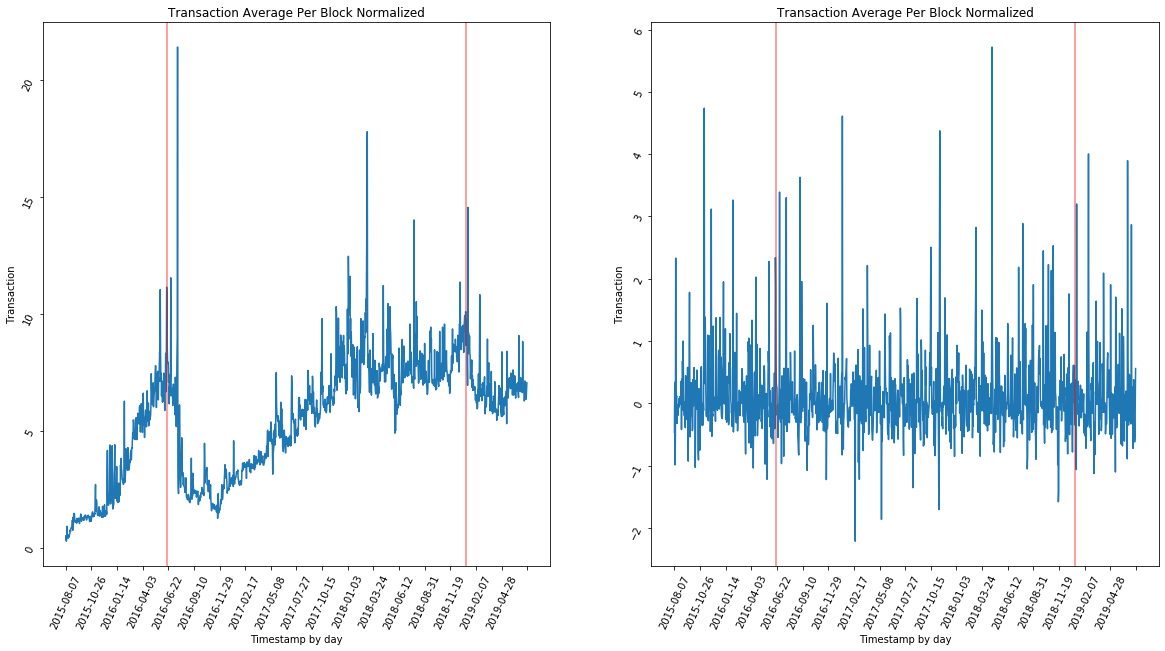

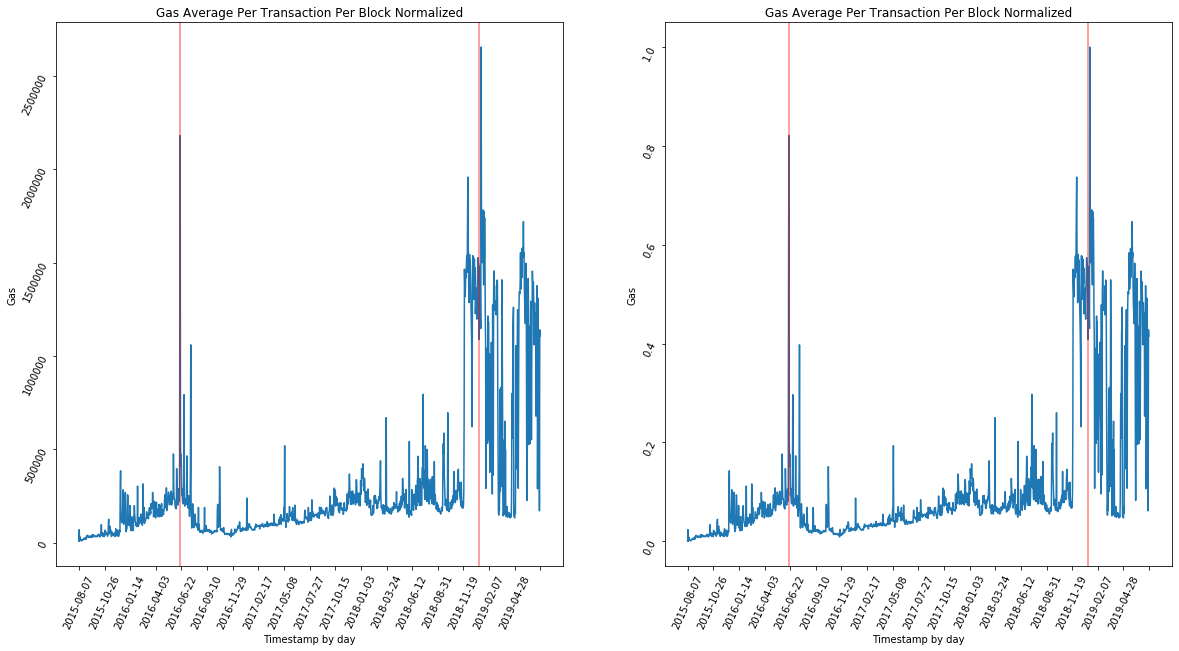

In [17]:
aggregation = {'gas_used':'mean','transaction_count':'mean'}
groups=f_dataset_blocks_difficulty_time.groupby('timestamp').agg(aggregation).rename(columns={'gas_used': 'gas_average','transaction_count':'transaction_average'})
d= groups['gas_average'].tolist()
e= groups['transaction_average'].tolist()


d = d[8:]
e = e[8:]
gas_average = d
transactions_average_per_block = mediana_quantile_mobile(e,w)
#transactions_average_per_block = minMax(e)
fig, axes = plt.subplots(1, 2, figsize=(weight, height))
plot2d(timestamp, e, 'Timestamp by day', 'Transaction','Transaction Average Per Block Normalized', axes[0])
plot2dTimestampVerticalLine(timestamp,transactions_average_per_block,'Timestamp by day','Transaction','Transaction Average Per Block Normalized', axes[1])


#d_norm = mediana_quantile_mobile(d,w)
d_norm = minMax(d)
gas_average_per_transactions_per_block = d_norm
fig, axes = plt.subplots(1, 2, figsize=(weight, height))
plot2d(timestamp, d, 'Timestamp by day', 'Gas','Gas Average Per Transaction Per Block Normalized', axes[0])
plot2dTimestampVerticalLine(timestamp,d_norm,'Timestamp by day','Gas','Gas Average Per Transaction Per Block Normalized', axes[1])



In [19]:
df = pd.DataFrame(columns=['timestamp','block_size_average','provided_gas_average','block_difficulty_average',
                                    'transactions_average_per_block',
                                    'gas_used_sum','transactions_number'])


a = df.assign(**{'timestamp' : timestamp,'block_size_average': block_size_average,'provided_gas_average':provided_gas_average,
                 'block_difficulty_average':block_difficulty_average[8:],
                 'transactions_average_per_block':transactions_average_per_block,
                'gas_used_sum' : gas_used_sum,'transactions_number' : transactions_number})

a.to_csv('features_mediana_mobile_norm_0_1_solo_gas_used_transaction_number_block_difficulty.csv')